In [20]:
import json
import requests
from secret import api_key
import networkx as nx

In [21]:
class national_park_site:
    def __init__(self, park):
        self.name = park['name']
        self.description = park['description']
        self.website = park['url']
        self.activities = park['activities']

In [22]:
#creating a dictionary of dictionaries for the national park information from the nps api. 
#For each national park in california, the key is the name of the park and the value is a dictionary of the park's information. 
#the following park information will be obtained from the nps api: park name, description, website, address, and activities.
def get_national_park_site():
    url = f"https://developer.nps.gov/api/v1/parks?stateCode=CA&api_key={api_key}"
    response = requests.get(url)
    data = response.json()
    national_parks_dictionary = {}
    for park in data['data']:
        national_parks_dictionary[park['name']] = {
            'name': park['name'],
            'description': park['description'],
            'url': park['url'],
            'addresses': park['addresses'],
            'activities': [activity['name'] for activity in park['activities']]
        }
    #store the parks dictionary in a json file
    with open('national_parks.json', 'w') as f:
        json.dump(national_parks_dictionary, f)


In [23]:
get_national_park_site()

In [24]:
#create an instance of the national_park class for each park in the national_parks.json file and store that as a list called parks
with open('national_parks.json', 'r') as f:
    national_parks_dictionary = json.load(f)
    parks = [national_park_site(park) for park in national_parks_dictionary.values()]



In [25]:
type(parks)

list

In [26]:
for park in parks:
    print(park.name)

Alcatraz Island
Butterfield Overland
Cabrillo
California
Castle Mountains
Channel Islands
César E. Chávez
Death Valley
Devils Postpile
Eugene O'Neill
Fort Point
Golden Gate
John Muir
Joshua Tree
Juan Bautista de Anza
Lassen Volcanic
Lava Beds
Manzanar
Mojave
Muir Woods
Old Spanish
Pinnacles
Point Reyes
Pony Express
Port Chicago Naval Magazine
Presidio of San Francisco
Redwood
Rosie the Riveter WWII Home Front
San Francisco Maritime
Santa Monica Mountains
Sequoia & Kings Canyon
Tule Lake
Whiskeytown
Yosemite


In [27]:
#remove park named 'Butterfield Overland] from the list of parks
parks = [park for park in parks if park.name != 'Butterfield Overland']

In [28]:
#Use the networkx library to create a graph of the national parks in california, where the nodes are the park names and the edges are the activities that the parks have in common.
#wrap this in a function called create_park_graph that takes in a list of national park objects and returns a graph object.
def create_park_graph(parks):
    G = nx.Graph()
    for park in parks:
        G.add_node(park.name)
        for other_park in parks:
            if park != other_park:
                common_activities = set(park.activities) & set(other_park.activities)
                if common_activities:
                    G.add_edge(park.name, other_park.name, weight=len(common_activities))
    return G

In [29]:
G = create_park_graph(parks)

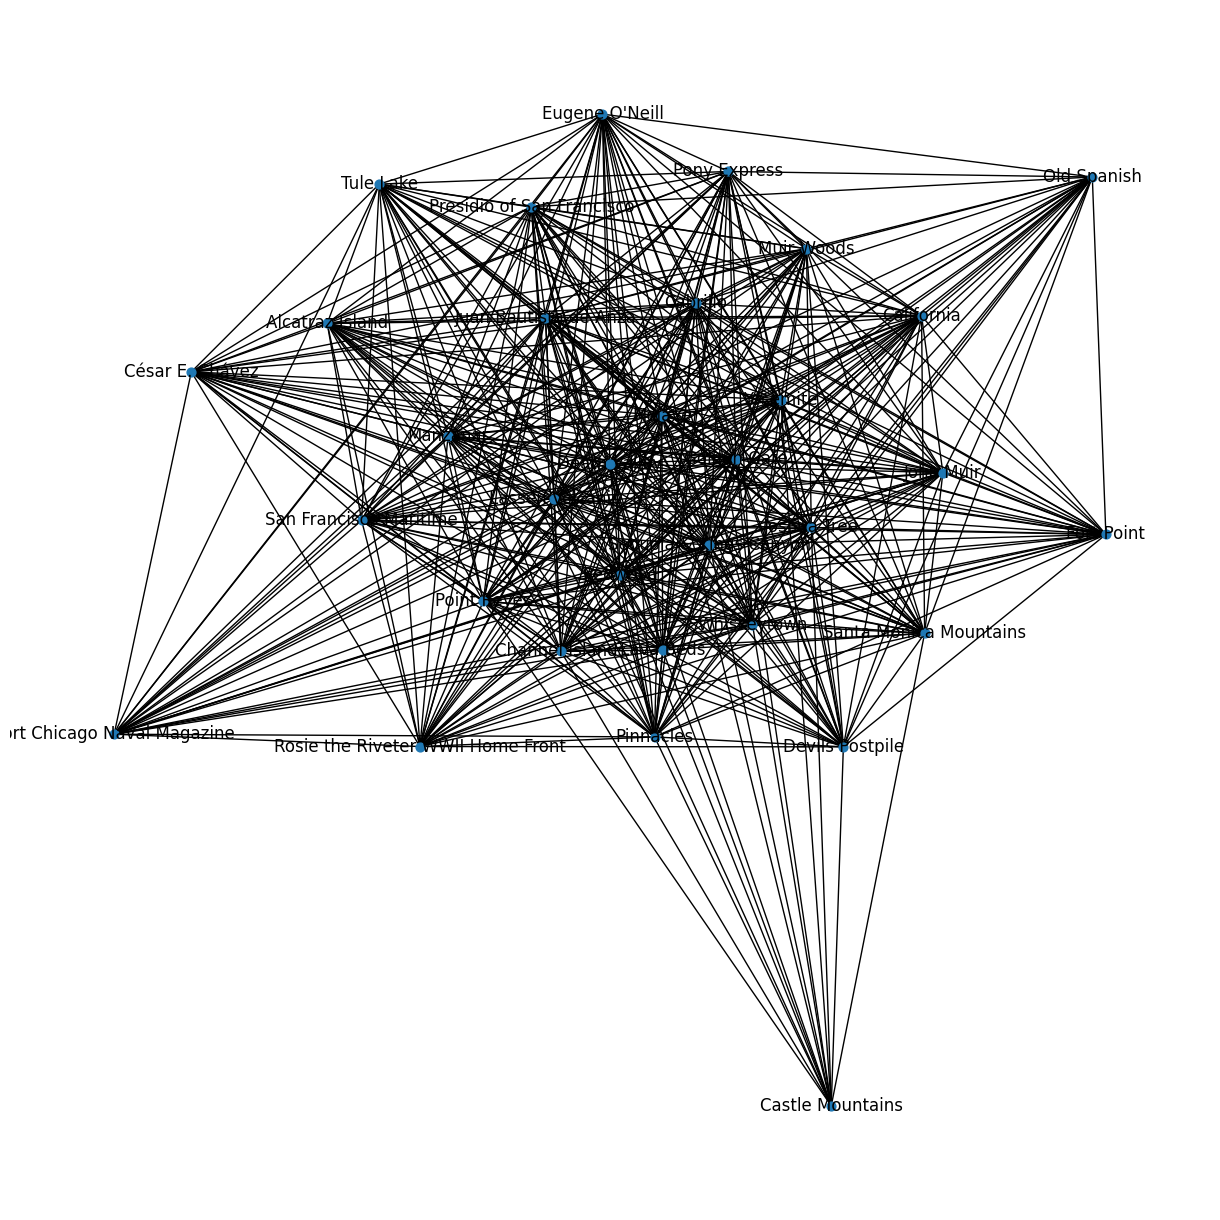

In [30]:
#visualize the graph of the national parks in california using networkx
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, node_size=40)
plt.show()


In [31]:
'''using the graph G, write a function called park_recommendations that takes in a park name and returns a list of recommended parks to visit based on the activities that the parks have in common.'''
def park_recommendations(park_name):
    recommended_parks = []
    for park in G.neighbors(park_name):
        recommended_parks.append(park)
    return recommended_parks

In [32]:
'''Using the graph G, write a function that returns the park with the most common activities with a given park name. 
The function should take in a park name and return the name of the park with the most common activities and a list of the shares activities.'''
def most_similar_park(park_name):
    most_similar_park = None
    most_shared_activities = []
    most_shared_activities_count = 0
    for other_park in G.neighbors(park_name):
        shared_activities = set(national_parks_dictionary[park_name]['activities']) & set(national_parks_dictionary[other_park]['activities'])
        if len(shared_activities) > most_shared_activities_count:
            most_shared_activities_count = len(shared_activities)
            most_shared_activities = shared_activities
            most_similar_park = other_park
    return most_similar_park, list(most_shared_activities)